In [1]:
import pandas as pd
pd.set_option("display.max_columns", None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import data (flights january, november, december and flight_test)

In [2]:
df_nov_dec = pd.read_csv("data/flights_2019_nov_dec.csv")
df_jan = pd.read_csv("data/flights_2019_jan_raw.csv")
df_weather = pd.read_csv("data/weather_data.txt")
df_passengers = pd.read_csv("data/passengers_nov_dec_jan_raw.csv")
df_fuel = pd.read_csv("data/fuel_comsumption_2018.csv")

In [3]:
# Flights df
df = pd.concat([df_nov_dec, df_jan]).reset_index().drop(columns=["index"])

In [4]:
flights_raw = df.copy()

### NA Values fixing

In [5]:
# make DF with delay columns for referencing
df_delays = pd.DataFrame()
df_delays = flights_raw[["carrier_delay","weather_delay","nas_delay","security_delay","late_aircraft_delay","arr_delay"]]

In [6]:
# Null value function
def missing(x):
    n_missing = x.isnull().sum().sort_values(ascending=False)
    p_missing = (x.isnull().sum()/x.isnull().count()).sort_values(ascending=False)
    missing_ = pd.concat([n_missing, p_missing],axis=1, keys = ['number','percent'])
    missing_ = missing_[missing_["percent"] > 0]
    return missing_

In [7]:
# Fill na function
def fill_columns(fill,columns,df):
    for col in columns:
        df[col].fillna(fill,inplace=True)

In [8]:
missing(flights_raw)

,number,percent
no_name,2644325,1.000000
total_add_gtime,2627839,0.993766
first_dep_time,2627838,0.993765
longest_add_gtime,2627838,0.993765
cancellation_code,2605974,0.985497
late_aircraft_delay,2178457,0.823823
security_delay,2178457,0.823823
nas_delay,2178457,0.823823
weather_delay,2178457,0.823823
carrier_delay,2178457,0.823823


In [9]:
flights_raw = flights_raw.drop(columns = ['no_name', 
                                          'longest_add_gtime',
                                          'total_add_gtime',
                                          'cancelled','diverted',
                                          'first_dep_time',
                                          'cancellation_code',
                                          'tail_num'],axis=1)

In [10]:
columns = ['late_aircraft_delay',
           'security_delay',
           'nas_delay',
           'weather_delay',
           'crs_elapsed_time',
           'carrier_delay',
           'dep_delay',
           'arr_delay']
fill_columns(0,columns,flights_raw)

In [11]:
# Drop no air_time values
flights_raw.drop(flights_raw.loc[flights_raw['air_time'].isnull()].index,inplace=True)

### save flights cleaned csv

In [12]:
#Export the cleaned dataframe
flights_raw.to_csv('data/flights_cleaned.csv')

# Merging weather data

In [13]:
flights_raw.shape

(2600640, 34)

In [14]:
flights_raw.sort_values(by="origin").head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
468075,2019-10-22,DL,DL_CODESHARE,DL,4325,OO,4325,10135,ABE,"Allentown/Bethlehem/Easton, PA",11433,DTW,"Detroit, MI",1746,1804.0,18.0,10.0,1814.0,1939.0,7.0,1940,1946.0,6.0,N,114.0,102.0,85.0,1.0,425.0,0.0,0.0,0.0,0.0,0.0
1040087,2019-11-17,AA,AA_CODESHARE,AA,5105,OH,5105,10135,ABE,"Allentown/Bethlehem/Easton, PA",11057,CLT,"Charlotte, NC",603,556.0,-7.0,13.0,609.0,742.0,16.0,825,758.0,-27.0,N,142.0,122.0,93.0,1.0,481.0,0.0,0.0,0.0,0.0,0.0
1636317,2019-12-15,UA,UA_CODESHARE,UA,4493,G7,4493,10135,ABE,"Allentown/Bethlehem/Easton, PA",13930,ORD,"Chicago, IL",800,859.0,59.0,25.0,924.0,1013.0,26.0,920,1039.0,79.0,N,140.0,160.0,109.0,1.0,654.0,59.0,0.0,20.0,0.0,0.0
406387,2019-10-20,UA,UA_CODESHARE,UA,4553,G7,4553,10135,ABE,"Allentown/Bethlehem/Easton, PA",13930,ORD,"Chicago, IL",1736,1801.0,25.0,15.0,1816.0,1909.0,12.0,1850,1921.0,31.0,N,134.0,140.0,113.0,1.0,654.0,8.0,0.0,6.0,0.0,17.0
1811254,2019-12-23,AA,AA_CODESHARE,AA,5105,OH,5105,10135,ABE,"Allentown/Bethlehem/Easton, PA",11057,CLT,"Charlotte, NC",500,452.0,-8.0,18.0,510.0,649.0,8.0,723,657.0,-26.0,N,143.0,125.0,99.0,1.0,481.0,0.0,0.0,0.0,0.0,0.0


In [15]:
df_weather.head() # seems "origin" and "location" are good.

,Unnamed: 0,date_time,location,totalSnow_cm,sunHour,cloudcover,precipMM,weather_type
0,0,2018-01-01,ABE,0.0,6.9,30,0.0,Sunny
1,1,2018-01-02,ABE,0.0,8.7,27,0.0,Sunny
2,2,2018-01-03,ABE,0.0,7.0,58,0.0,Cloudy
3,3,2018-01-04,ABE,0.2,3.5,99,4.7,Snowy
4,4,2018-01-05,ABE,0.0,5.2,71,0.0,Cloudy


In [16]:
print(type(df_weather["date_time"][0]))
print(type(flights_raw["fl_date"][0]))

<class 'str'>
<class 'str'>


In [17]:
df_weather = df_weather.filter(items=['date_time', 'location', 'weather_type'])
df_weather.head()

,date_time,location,weather_type
0,2018-01-01,ABE,Sunny
1,2018-01-02,ABE,Sunny
2,2018-01-03,ABE,Cloudy
3,2018-01-04,ABE,Snowy
4,2018-01-05,ABE,Cloudy


In [18]:
flights_weather = flights_raw.merge(df_weather, left_on=['fl_date', 'origin'], right_on=['date_time', 'location'])

In [19]:
flights_weather = flights_weather.drop(labels=['date_time', 'location'], axis=1)

In [20]:
missing(flights_weather) # good to go.

,number,percent


### save flights with weather csv

In [21]:
#Export the cleaned dataframe
flights_weather.to_csv('data/flights_cleaned_weather.csv')

# Merging Passenger data

In [50]:
# how to merge passenger data? it's monthly
df_passengers = pd.read_csv("data/passengers_nov_dec_jan_raw.csv")
df_passengers.head()

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,unique_carrier,airline_id,unique_carrier_name,region,carrier,carrier_name,carrier_group,carrier_group_new,origin_airport_id,origin_city_market_id,origin,origin_city_name,origin_country,origin_country_name,dest_airport_id,dest_city_market_id,dest,dest_city_name,dest_country,dest_country_name,aircraft_group,aircraft_type,aircraft_config,year,month,distance_group,class,data_source
0,75.0,75.0,6962210.0,18313.0,16390.0,483052.0,150581.0,2475.0,27877.0,24967.0,DL,19790,Delta Air Lines Inc.,D,DL,Delta Air Lines Inc.,3,3,12478,31703,JFK,"New York, NY",US,United States,12892,32575,LAX,"Los Angeles, CA",US,United States,6,624,1,2018,11,5,F,DU
1,75.0,74.0,2212600.0,8140.0,6919.0,11629.0,34431.0,920.0,11684.0,10076.0,DL,19790,Delta Air Lines Inc.,D,DL,Delta Air Lines Inc.,3,3,13198,33198,MCI,"Kansas City, MO",US,United States,14869,34614,SLC,"Salt Lake City, UT",US,United States,6,608,1,2018,11,2,F,DU
2,75.0,75.0,3732000.0,14923.0,13551.0,37667.0,3988.0,1310.0,15094.0,13560.0,DL,19790,Delta Air Lines Inc.,D,DL,Delta Air Lines Inc.,3,3,13204,31454,MCO,"Orlando, FL",US,United States,13487,31650,MSP,"Minneapolis, MN",US,United States,6,622,1,2018,11,3,F,DU
3,75.0,75.0,2948400.0,11250.0,9127.0,3294.0,3866.0,361.0,6151.0,4149.0,AA,19805,American Airlines Inc.,D,AA,American Airlines Inc.,3,3,11057,31057,CLT,"Charlotte, NC",US,United States,10821,30852,BWI,"Baltimore, MD",US,United States,6,694,1,2018,11,1,F,DU
4,75.0,75.0,2684300.0,9600.0,7808.0,7126.0,3418.0,224.0,5421.0,3590.0,AA,19805,American Airlines Inc.,D,AA,American Airlines Inc.,3,3,11298,30194,DFW,"Dallas/Fort Worth, TX",US,United States,12266,31453,IAH,"Houston, TX",US,United States,6,698,1,2018,11,1,F,DU


In [51]:
features_list_passengers = ['passengers', 
                            'origin', 'month']
df_passengers = df_passengers.filter(items=features_list_passengers)
df_passengers = df_passengers[df_passengers.month > 11]
df_passengers.head()

,passengers,origin,month
5,9429.0,PDX,12
6,23438.0,SFO,12
7,10245.0,SFO,12
8,11871.0,EWR,12
9,4775.0,DTW,12


In [52]:
df_passengers_merge = df_passengers.drop(labels='month', axis=1)

In [53]:
df_passengers_merge = df_passengers.groupby(by="origin").sum()

In [54]:
len(df_passengers_merge)

1465

### warning: next merge cell is a memory hog

In [55]:
# # If sampling is needed because merge takes too long
# flights_weather_sample = flights_weather.sample(frac = 0.05)

In [57]:
flights_weather_passengers = flights_weather.merge(df_passengers_merge, how='left', on='origin')

###  save flights with weather AND passenger csv (we don't need this one, it's huge anyway 500mb+)

In [59]:
#Export the cleaned dataframe
# flights_weather_passengers.to_csv('data/flights_cleaned_weather_passenger.csv')

## Mapping airport/airline names for plotting

In [60]:
# # Mapping file for airport names
# import json
# with open('airport_names_dict.txt') as f: # my map
#     data = f.read()
# airport_names_dict = json.loads(data)

In [61]:
# # Adding new column with full airport names
# df["airport_names"] = df["origin"]
# df["airport_names"] = df['airport_names'].map(airport_names_dict) 

In [62]:
# # Mapping file for airline names
# import json
# with open('airline_names_dict.txt') as f: # my map
#     data2 = f.read()
# airline_names_dict = json.loads(data2)

In [63]:
# # Adding new column with full airline names
# df["airline_names"] = df["mkt_carrier"]
# df["airline_names"] = df['airline_names'].map(airline_names_dict) 

# Outlier removal

In [65]:
Q1_arrival = flights_weather_passengers.arr_delay.quantile(0.25)
Q3_arrival = flights_weather_passengers.arr_delay.quantile(0.75)
IQR = Q3_arrival - Q1_arrival
flights_no_outlier_iqr = flights_weather_passengers.loc[(flights_weather_passengers['arr_delay'] >= (Q1_arrival - 1.5*IQR))\
                                     & (flights_weather_passengers['arr_delay'] <= Q3_arrival + 1.5*IQR)]

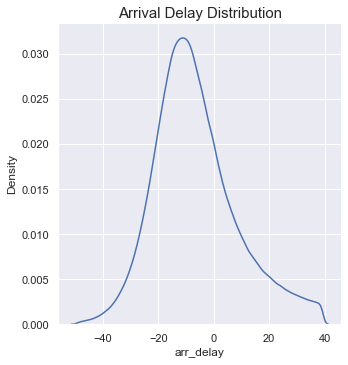

In [66]:
# Arrival Delay Distribution after excluding the outliers
sns.set_theme(style="darkgrid")
sns.displot(flights_no_outlier_iqr, x="arr_delay",kind='kde')
plt.title("Arrival Delay Distribution", size=15)
plt.show()

In [67]:
# Removing outliers for departure delay
Q1_dep = flights_no_outlier_iqr.dep_delay.quantile(0.25)
Q3_dep = flights_no_outlier_iqr.dep_delay.quantile(0.75)
IQR_dep = Q3_dep - Q1_dep
flights_no_outlier_iqr = flights_no_outlier_iqr.loc[(flights_no_outlier_iqr['dep_delay'] >= (Q1_dep - 1.5*IQR_dep))\
                                     & (flights_no_outlier_iqr['dep_delay'] <= Q3_dep + 1.5*IQR_dep)]

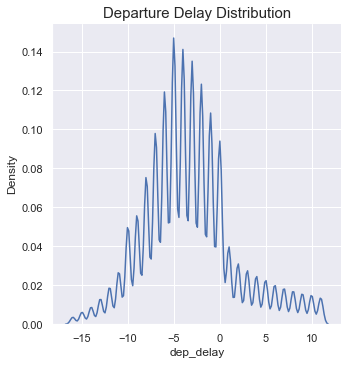

In [68]:
sns.set_theme(style="darkgrid")
sns.displot(flights_no_outlier_iqr, x="dep_delay",kind='kde')
plt.title("Departure Delay Distribution", size=15)
plt.show()

In [69]:
flights_no_outlier_iqr.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,weather_type,passengers,month
0,2019-10-02,AA,AA_CODESHARE,AA,5330,OH,5330,10581,BGR,"Bangor, ME",11278,DCA,"Washington, DC",543,535.0,-8.0,11.0,546.0,726.0,5.0,749,731.0,-18.0,N,126.0,116.0,100.0,1.0,590.0,0.0,0.0,0.0,0.0,0.0,Rainy,85523.0,1788.0
3,2019-10-02,AA,AA_CODESHARE,AA,3073,OO,3073,10581,BGR,"Bangor, ME",13930,ORD,"Chicago, IL",1328,1324.0,-4.0,17.0,1341.0,1515.0,14.0,1530,1529.0,-1.0,N,182.0,185.0,154.0,1.0,978.0,0.0,0.0,0.0,0.0,0.0,Rainy,85523.0,1788.0
4,2019-10-02,AA,AA_CODESHARE,AA,4023,MQ,4023,10581,BGR,"Bangor, ME",12953,LGA,"New York, NY",1449,1449.0,0.0,13.0,1502.0,1612.0,2.0,1629,1614.0,-15.0,N,100.0,85.0,70.0,1.0,378.0,0.0,0.0,0.0,0.0,0.0,Rainy,85523.0,1788.0
5,2019-10-02,G4,G4,G4,2119,G4,2119,10581,BGR,"Bangor, ME",14761,SFB,"Sanford, FL",1301,1308.0,7.0,7.0,1315.0,1554.0,5.0,1623,1559.0,-24.0,N,202.0,171.0,159.0,1.0,1299.0,0.0,0.0,0.0,0.0,0.0,Rainy,85523.0,1788.0
7,2019-10-02,AA,AA_CODESHARE,AA,4730,PT,4730,10581,BGR,"Bangor, ME",14100,PHL,"Philadelphia, PA",1001,951.0,-10.0,9.0,1000.0,1127.0,7.0,1149,1134.0,-15.0,N,108.0,103.0,87.0,1.0,473.0,0.0,0.0,0.0,0.0,0.0,Rainy,85523.0,1788.0


In [70]:
# Add delays to column named combined_delay
columns = ['late_aircraft_delay','security_delay','nas_delay','weather_delay','carrier_delay']
flights_no_outlier_iqr['combined_delay'] = 0
for col in columns:
    flights_no_outlier_iqr['combined_delay'] = flights_no_outlier_iqr['combined_delay']+flights_no_outlier_iqr[col]

In [71]:
flights_no_outlier_iqr['combined_delay'].sort_values(ascending=False)

2005738    39.0
2503222    39.0
2275464    39.0
1552904    39.0
2457306    39.0
           ... 
860604      0.0
860603      0.0
860602      0.0
860601      0.0
2600236     0.0
Name: combined_delay, Length: 2073115, dtype: float64

In [72]:
flights_no_outlier_iqr.shape

(2073115, 38)

### save our final, working csv

In [73]:
flights_no_outlier_iqr.to_csv('data/flights_cleaned_no_outlier_iqr_with_delays.csv')

In [75]:
flights_no_outlier_iqr.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,weather_type,passengers,month,combined_delay
0,2019-10-02,AA,AA_CODESHARE,AA,5330,OH,5330,10581,BGR,"Bangor, ME",11278,DCA,"Washington, DC",543,535.0,-8.0,11.0,546.0,726.0,5.0,749,731.0,-18.0,N,126.0,116.0,100.0,1.0,590.0,0.0,0.0,0.0,0.0,0.0,Rainy,85523.0,1788.0,0.0
3,2019-10-02,AA,AA_CODESHARE,AA,3073,OO,3073,10581,BGR,"Bangor, ME",13930,ORD,"Chicago, IL",1328,1324.0,-4.0,17.0,1341.0,1515.0,14.0,1530,1529.0,-1.0,N,182.0,185.0,154.0,1.0,978.0,0.0,0.0,0.0,0.0,0.0,Rainy,85523.0,1788.0,0.0
4,2019-10-02,AA,AA_CODESHARE,AA,4023,MQ,4023,10581,BGR,"Bangor, ME",12953,LGA,"New York, NY",1449,1449.0,0.0,13.0,1502.0,1612.0,2.0,1629,1614.0,-15.0,N,100.0,85.0,70.0,1.0,378.0,0.0,0.0,0.0,0.0,0.0,Rainy,85523.0,1788.0,0.0
5,2019-10-02,G4,G4,G4,2119,G4,2119,10581,BGR,"Bangor, ME",14761,SFB,"Sanford, FL",1301,1308.0,7.0,7.0,1315.0,1554.0,5.0,1623,1559.0,-24.0,N,202.0,171.0,159.0,1.0,1299.0,0.0,0.0,0.0,0.0,0.0,Rainy,85523.0,1788.0,0.0
7,2019-10-02,AA,AA_CODESHARE,AA,4730,PT,4730,10581,BGR,"Bangor, ME",14100,PHL,"Philadelphia, PA",1001,951.0,-10.0,9.0,1000.0,1127.0,7.0,1149,1134.0,-15.0,N,108.0,103.0,87.0,1.0,473.0,0.0,0.0,0.0,0.0,0.0,Rainy,85523.0,1788.0,0.0
